# Homework Assignment 1

In [1]:
# Run this cell to install all required modules
!pip install numpy
!pip install matplotlib
!pip install scipy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np

#### Problem 1. Evaluate the below algebraic expressions.

In [3]:
# Problem 0 - example
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
sol = A + B
print(sol)

[[2 2]
 [3 5]]


In [4]:
# Problem 1 (a)
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[5, 1, 3], [3, 2, 2]])
sol = A + B
print(sol)

[[6 3 6]
 [7 7 8]]


In [5]:
# Problem 1 (b)
A = np.array([[3, 1, 3], [1, 2, 2]])
B = np.array([[8, 2, 2], [4, 4, 6]])
""" TODO: Write your solution here """
sol = 2*A - 0.5*B
print(sol)

[[2. 1. 5.]
 [0. 2. 1.]]


In [6]:
# Problem 1 (c)
A = np.array([[3, 1, 3], [1, 2, 3]])
B = np.array([[1, 5, 3], [5, 4, 1]])
""" TODO: Write your solution here """
sol = 0.5*(A + B)
print(sol)

[[2. 3. 3.]
 [3. 3. 2.]]


In [7]:
# Problem 1 (d)
A = np.array([[3, 1, 2], [3, 2, 4]])
B = np.array([[1, 1, 0], [2, 0, 1]])
""" TODO: Write your solution here """
sol = np.dot(A, np.transpose(B))
print(sol)

[[ 4  8]
 [ 5 10]]


In [8]:
# Problem 1 (e)
""" TODO: Write your solution here """
sol = np.trace([[1,3,2],[6,4,5],[9,8,7]])
print(sol)

12


In [9]:
# Problem 1 (f)
""" TODO: Write your solution here """
sol = np.linalg.inv([[3, 2],[-7, -5]])
print(sol)

[[ 5.  2.]
 [-7. -3.]]


In [10]:
# Problem 1 (g)
""" TODO: Write your solution here """
sol = np.linalg.inv([[1, -3, 5],[-1, 4, -5],[-1, 3, -6]])
print(sol)

[[ 9.  3.  5.]
 [ 1.  1.  0.]
 [-1. -0. -1.]]


In [11]:
# Problem 1 (h)
""" TODO: Write your solution here """
A= np.array([[1, 3],[4, -5]])
sol = np.linalg.det(A)
print(sol)

-17.0


#### Problem 2. Solve the following systems of linear equations.

In [12]:
# Problem 2 (a)
# 2x + y = 5
# -x + 3y = 1
""" TODO: Write your solution here """
A= np.linalg.inv([[2,1],[-1,3]])
B= np.array([5,1])
sol = np.dot(A, np.transpose(B))
print(sol)

[2. 1.]


In [13]:
# Problem 2 (b)
# 5x + y - 2z = -4
# 2x + y + 5z = 1
# x - y + 2z = 1
""" TODO: Write your solution here """
A= np.linalg.inv([[5,1, -2],[2, 1, 5],[1,-1,2]])
B= np.array([-4,1,1])
sol = np.dot(A, np.transpose(B))
print(sol)

[-0.5 -0.5  0.5]


#### Problem 3. k-Means Clustering

In [14]:
import random as rd

In [15]:
# Problem 3 (a)
from math import *
def euclidian_distance(a, b):
    """ 
    Takes two vectors and returns the Euclidean distance between them 
    Input: a - input vector a
           b - input vector b
    Output: the Euclidean distance between vectors a and b
    """
    
    """ TODO: Write your solution here """
    distance = 0;
    for i in range(len(a)):
        distance = distance + (a[i]-b[i]) * (a[i]-b[i])
    return sqrt(distance)

In [16]:
# Problem 3 (b)
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidian_distance):
    """
    K-Means clustering algorithm. 
    Input: X - array of input vectors
           K - number of centroids
           max_iter - limit of iteration
           tol - variable to check wheter some of squared error is smaller than some value 
           distance_metric - the method of calculating distance (ex. euclidean distance)
    Output: c - c[i] = centroid which is nearest to i-th vector
            centroids - k centroid's location.
            log_centroids - history of centroid
            log_c - history of c
            log_sse - history of sum of suquared error
    """
    
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
    log_centroids.append(log_centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    

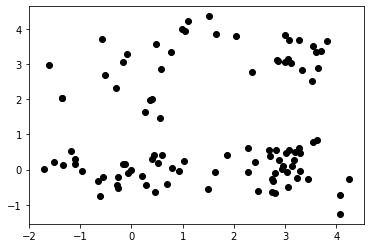

In [17]:
# Problem 3 (c)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_data(N=100):
    """ 
    Generates a random dataset (multivariate normal) 
    Input: N - number of instances to create
    Output: X - generated (synthetic) dataset
    """
    
    means = [[0, 0], [3, 3], [0, 3], [3, 0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]], 
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]

    X = np.zeros((N, 2))
    for n in range(N):
        seed = rd.randint(0, 3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])
    
    return X

X = generate_random_data()
plt.scatter(X[:,0], X[:,1], c='k')


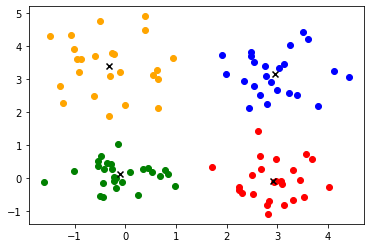

In [18]:
# Problem 3 (c) - part 1
""" TODO: Write your solution here """
X = generate_random_data()
c, centroids, log_centroids, log_c, log_sse = kmeans(X, 4, max_iter=100, tol=0.00005)
row, col =X.shape
for i in range(row):
    if(c[i] == 0):
        plt.scatter(X[i][0], X[i][1], c='red')
    elif(c[i] == 1):
        plt.scatter(X[i][0], X[i][1], c='blue')
    elif(c[i] == 2):
        plt.scatter(X[i][0], X[i][1], c='green')
    else:
        plt.scatter(X[i][0], X[i][1], c='orange')

ro, co = centroids.shape
for i in range(ro):
    plt.scatter(centroids[i][0], centroids[i][1], c='black', marker='x')
    
    

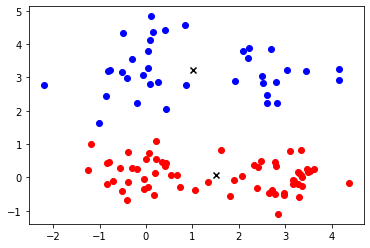

In [19]:
# Problem 3 (c) - part 2
X = generate_random_data()
c, centroids, log_centroids, log_c, log_sse = kmeans(X, 2, max_iter=100, tol=0.00005)
row, col =X.shape
for i in range(row):
    if(c[i] == 0):
        plt.scatter(X[i][0], X[i][1], c='red')
    elif(c[i] == 1):
        plt.scatter(X[i][0], X[i][1], c='blue')

ro, co = centroids.shape
for i in range(ro):
    plt.scatter(centroids[i][0], centroids[i][1], c='black', marker='x')

In [20]:
# Problem 3 (d)
my_data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1)
# print(my_data)
N, d = my_data.shape
print(N)
print(d)

from scipy import stats
stats.describe(my_data)

200
4


DescribeResult(nobs=200, minmax=(array([ 0., 18., 15.,  1.]), array([  1.,  70., 137.,  99.])), mean=array([ 0.56, 38.85, 60.56, 50.2 ]), variance=array([2.47638191e-01, 1.95133166e+02, 6.89835578e+02, 6.66854271e+02]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

In [21]:
# Problem 3 (d)
def normalize(X):
    """
    mean-std normalization (standardization)
    Takes and applies a normalization on the input matrix X
    Input: X - data matrix (numpy array)
    Output: X_normalized - normalized data matrix
    """
    
    """ TODO: Write your solution here """
    row, col = X.shape
    norm_X = np.zeros((row, col))
    
    mean = X.mean(axis = 0)
    var = X.std(axis = 0)
    
    for i in range(row):
        for j in range(col):
            norm_X[i][j] = ((X[i][j] - mean[j])/var[j])

    return norm_X

cluster of  0 -th vector :  6
cluster of  1 -th vector :  6
cluster of  2 -th vector :  4
cluster of  3 -th vector :  5
cluster of  4 -th vector :  4
cluster of  5 -th vector :  5
cluster of  6 -th vector :  4
cluster of  7 -th vector :  5
cluster of  8 -th vector :  7
cluster of  9 -th vector :  5
cluster of  10 -th vector :  7
cluster of  11 -th vector :  5
cluster of  12 -th vector :  7
cluster of  13 -th vector :  5
cluster of  14 -th vector :  6
cluster of  15 -th vector :  6
cluster of  16 -th vector :  4
cluster of  17 -th vector :  6
cluster of  18 -th vector :  7
cluster of  19 -th vector :  5
cluster of  20 -th vector :  6
cluster of  21 -th vector :  6
cluster of  22 -th vector :  4
cluster of  23 -th vector :  6
cluster of  24 -th vector :  4
cluster of  25 -th vector :  6
cluster of  26 -th vector :  4
cluster of  27 -th vector :  6
cluster of  28 -th vector :  4
cluster of  29 -th vector :  5
cluster of  30 -th vector :  7
cluster of  31 -th vector :  5
cluster of  32 -th

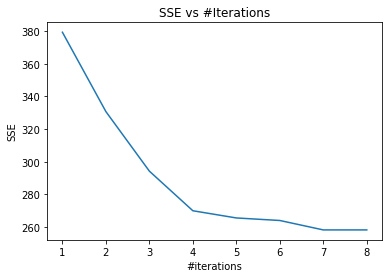

In [25]:
# Problem 3 (e)
""" TODO: Write your solution here """
normalized_data = normalize(my_data)

c, centroids, log_centroids, log_c, log_sse = kmeans(normalized_data, 7 , max_iter=100, tol=0.00005)
plt.title("SSE vs #Iterations")
plt.ylabel("SSE")
plt.xlabel("#iterations")
plt.plot(range(1, len(log_sse)+1), log_sse)
for i in range(my_data.shape[0]):
    print("cluster of ",i, "-th vector : ", c[i]+1)
    
print(log_sse)

=====cluster1=====
mean :  [ 0.         49.5625     60.6875     29.97916667]
std :  [ 0.         13.75061552 21.90429586 19.34176136]
min :  [ 0. 19. 19.  1.]
max :  [  0.  70. 113.  60.]
=====cluster2=====
mean :  [ 0.83636364 27.10909091 47.8        69.14545455]
std :  [ 0.36994527  5.41940194 23.35761507 16.86677011]
min :  [ 0. 18. 15. 39.]
max :  [ 1. 38. 88. 99.]
=====cluster3=====
mean :  [ 0.16216216 29.89189189 80.75675676 72.48648649]
std :  [ 0.36859951  6.433795   25.27086283 18.52481407]
min :  [ 0. 18. 38. 18.]
max :  [  1.  40. 137.  97.]
=====cluster4=====
mean :  [ 1.         46.56666667 59.7        35.26666667]
std :  [ 0.         10.78326893 24.67069787 15.95709525]
min :  [ 1. 20. 16.  5.]
max :  [  1.  68. 126.  59.]


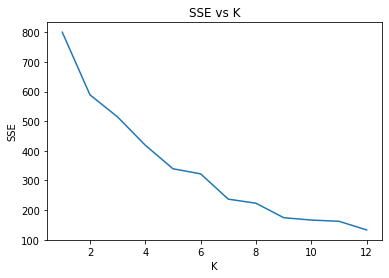

In [48]:
# Problem 3 (f)
""" TODO: Write your solution here """
all_last_sse = []
normalized_data = normalize(my_data)
#normalized_data = my_data
for i in range(12):
    c, centroids, log_centroids, log_c, log_sse = kmeans(normalized_data, i+1, max_iter=100, tol=0.00005)
    all_last_sse.append(log_sse[len(log_sse)-1])
plt.title("SSE vs K")
plt.ylabel("SSE")
plt.xlabel("K")
plt.plot(range(1, 13), all_last_sse)

c, centroids, log_centroids, log_c, log_sse = kmeans(normalized_data, 4, max_iter=100, tol=0.00005)
cluster1 =[]
cluster2 =[]
cluster3 =[]
cluster4 =[]

for i in range(len(c)):
    if(c[i] == 0):
        cluster1.append(my_data[i])
    elif(c[i] == 1):
        cluster2.append(my_data[i])
    elif(c[i] == 2):
        cluster3.append(my_data[i])
    else:
        cluster4.append(my_data[i])

cl1=np.array(cluster1)
cl2=np.array(cluster2)
cl3=np.array(cluster3)
cl4=np.array(cluster4)

print("=====cluster1=====")
print("mean : ", cl1.mean(axis=0))
print("std : ", cl1.std(axis=0))
print("min : ", cl1.min(axis=0))
print("max : ", cl1.max(axis=0))
print("=====cluster2=====")
print("mean : ", cl2.mean(axis=0))
print("std : ", cl2.std(axis=0))
print("min : ", cl2.min(axis=0))
print("max : ", cl2.max(axis=0))
print("=====cluster3=====")
print("mean : ", cl3.mean(axis=0))
print("std : ", cl3.std(axis=0))
print("min : ", cl3.min(axis=0))
print("max : ", cl3.max(axis=0))
print("=====cluster4=====")
print("mean : ", cl4.mean(axis=0))
print("std : ", cl4.std(axis=0))
print("min : ", cl4.min(axis=0))
print("max : ", cl4.max(axis=0))

In [47]:
# Problem 3 (g) - Extra point
""" TODO: You may copy the kmeans() function from Problem 3(b) to here
         and modify it from this cell """
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidian_distance):
    """
    K-Means clustering algorithm. 
    Input: X - list of input vectors
           K - number of centroids
           max_iter - limit of iteration
           tol - variable to check wheter some of squared error is smaller than some value 
           distance_metric - the method of calculating distance (ex. euclidean distance)
    Output: c - c[i] = centroid which is nearest to i-th vector
            centroids - k centroid's location.
            log_centroids - history of centroid
            log_c - history of c
            log_sse - history of sum of suquared error
    """
    
    N, d = X.shape #N * d matrix, N = 전체 점 개수, d = 점 좌표
    
    centroids = np.zeros((K, d)) #shape of K*d matrix
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = [] #
    log_c = [] #
    log_centroids = [] #

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1) #choose one point
        centroids[k] = X[rand_index] #
    log_centroids.append(log_centroids) #??
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = [] #
        for n in range(N): #전체 점 개수 만큼
            dist_to_centroids = [] #centroids 까지의 거리
            
            for k in range(K): #중점 개수 만큼
                dist_to_centroids.append(distance_metric(X[n], centroids[k])) #같은점가지고 세 클러스터랑 거리계산
            
            c.append(np.argmin(dist_to_centroids)) # c? 최솟값에 해당하는 index
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d)) #중점들 담은곳
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            if(tmp_count>0):
                centroids[k] = tmp_sum / tmp_count
            else:
                centroids[k] = prev_centroids[k]
        log_centroids.append(centroids)
        # 업뎃끝
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    